In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

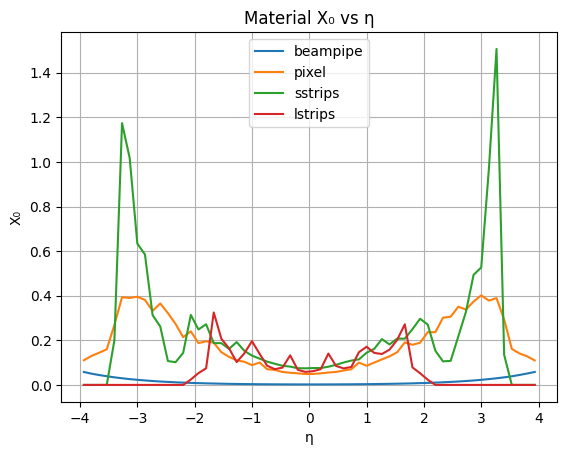

In [2]:
# f = uproot.open("/data/jlai/iris-hep2/OpenDataDetector/ci/reference/material_composition.root")
f = uproot.open("/data/jlai/iris-hep/material-map/material_composition.root")


names = {
    "beampipe": "beampipe_x0_vs_eta_all",
    "pixel": "pixel_x0_vs_eta_all",
    "sstrips": "sstrips_x0_vs_eta_all",
    "lstrips": "lstrips_x0_vs_eta_all",
}

plt.figure()

for label, key in names.items():
    h = f[key]
    eta = h.axis().edges()
    x0 = h.values()
    eta_centers = 0.5 * (eta[1:] + eta[:-1])
    plt.plot(eta_centers, x0, label=label)

plt.xlabel("η")
plt.ylabel("X₀")
plt.title("Material X₀ vs η")
plt.legend()
plt.grid(True)
plt.savefig("x0_vs_eta.png")
plt.show()


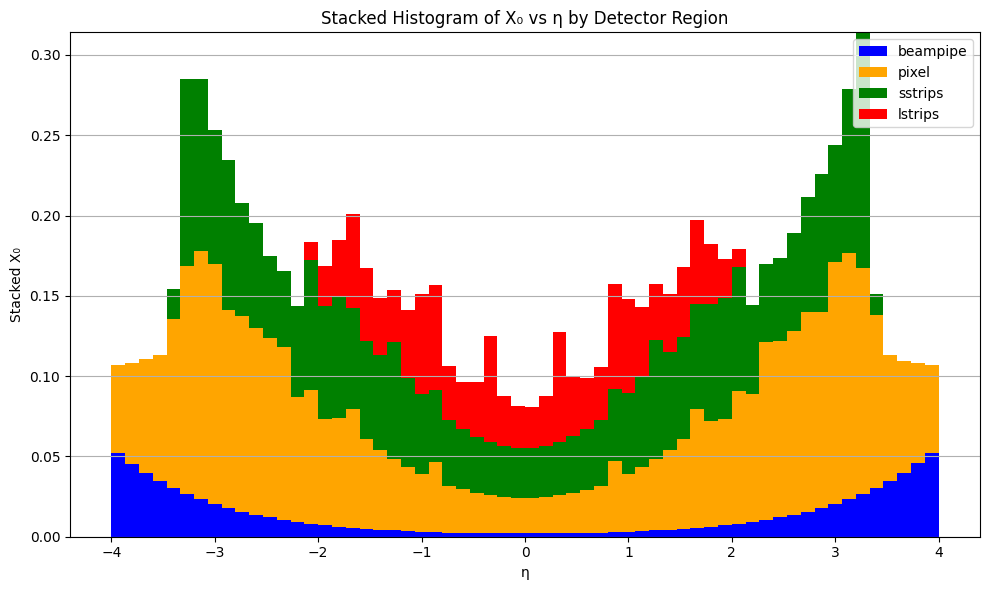

In [3]:
# f = uproot.open("/data/jlai/iris-hep2/OpenDataDetector/ci/reference/material_composition.root")
f = uproot.open("/data/jlai/iris-hep/material-map/material_composition.root")


names = {
    "beampipe": "beampipe_l0_vs_eta_all",
    "pixel": "pixel_l0_vs_eta_all",
    "sstrips": "sstrips_l0_vs_eta_all",
    "lstrips": "lstrips_l0_vs_eta_all",
}

# Load all histograms and binning
group_labels = []
group_data = []

for label, key in names.items():
    h = f[key]
    eta_edges = h.axis().edges()
    x0_vals = h.values()
    group_labels.append(label)
    group_data.append(x0_vals)

# Convert to numpy array
group_data = np.array(group_data)  # shape: (n_groups, n_bins)
eta_centers = 0.5 * (eta_edges[1:] + eta_edges[:-1])
bin_width = np.diff(eta_edges)

# Plot stacked histogram
plt.figure(figsize=(10, 6))
bottom = np.zeros_like(eta_centers)

colors = ['blue', 'orange', 'green', 'red'] 
for i, (label, x0_vals) in enumerate(zip(group_labels, group_data)):
    plt.bar(
        eta_centers,
        x0_vals,
        width=bin_width,
        bottom=bottom,
        label=label,
        align="center",
        color=colors[i % len(colors)],
    )
    bottom += x0_vals  # stack

plt.xlabel("η")
plt.ylabel("Stacked X₀")
plt.title("Stacked Histogram of X₀ vs η by Detector Region")
plt.legend(loc="upper right")
plt.grid(True, axis="y")
plt.tight_layout()
plt.savefig("x0_vs_eta_stacked_hist.png")
plt.show()


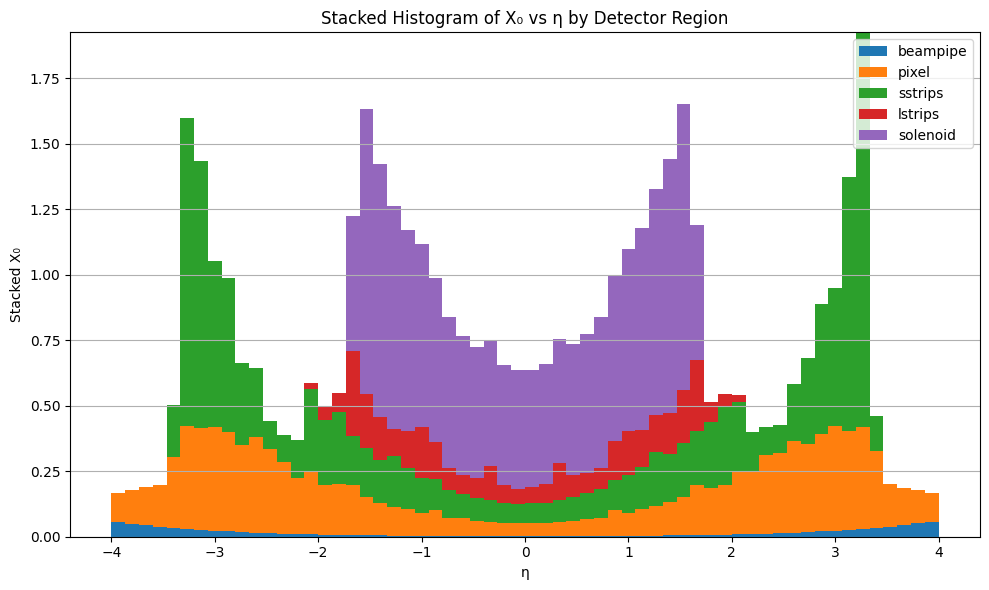

In [8]:
# f = uproot.open("/data/jlai/iris-hep2/OpenDataDetector/ci/reference/material_composition.root")
f = uproot.open("/data/jlai/iris-hep/material-map/material_composition.root")


names = {
    "beampipe": "beampipe_x0_vs_eta_all",
    "pixel": "pixel_x0_vs_eta_all",
    "sstrips": "sstrips_x0_vs_eta_all",
    "lstrips": "lstrips_x0_vs_eta_all",
    "solenoid": "solenoid_x0_vs_eta_all",
    # "ecalbarrel": "ecalbarrel_x0_vs_eta_all",
    # "ecalendcap": "ecalendcap_x0_vs_eta_all",
    # "hcalbarrel": "hcalbarrel_x0_vs_eta_all",
    # "hcalendcap": "hcalendcap_x0_vs_eta_all"
}

# Load all histograms and binning
group_labels = []
group_data = []

for label, key in names.items():
    h = f[key]
    eta_edges = h.axis().edges()
    x0_vals = h.values()
    group_labels.append(label)
    group_data.append(x0_vals)

# Convert to numpy array
group_data = np.array(group_data)  # shape: (n_groups, n_bins)
eta_centers = 0.5 * (eta_edges[1:] + eta_edges[:-1])
bin_width = np.diff(eta_edges)

# Plot stacked histogram
plt.figure(figsize=(10, 6))
bottom = np.zeros_like(eta_centers)

# colors = ['blue', 'orange', 'green', 'red'] 
for i, (label, x0_vals) in enumerate(zip(group_labels, group_data)):
    plt.bar(
        eta_centers,
        x0_vals,
        width=bin_width,
        bottom=bottom,
        label=label,
        align="center",
        # color=colors[i % len(colors)],
    )
    bottom += x0_vals  # stack

plt.xlabel("η")
plt.ylabel("Stacked X₀")
plt.title("Stacked Histogram of X₀ vs η by Detector Region")
plt.legend(loc="upper right")
plt.grid(True, axis="y")
plt.tight_layout()
plt.savefig("x0_vs_eta_stacked_hist.png")
plt.show()


In [14]:
f.keys()

['beampipe_x0_vs_eta_all;1',
 'beampipe_l0_vs_eta_all;1',
 'beampipe_x0_vs_phi_all;1',
 'beampipe_l0_vs_phi_all;1',
 'beampipe_x0_vs_eta_A9;1',
 'beampipe_l0_vs_eta_A9;1',
 'beampipe_x0_vs_phi_A9;1',
 'beampipe_l0_vs_phi_A9;1',
 'pixel_x0_vs_eta_all;1',
 'pixel_l0_vs_eta_all;1',
 'pixel_x0_vs_phi_all;1',
 'pixel_l0_vs_phi_all;1',
 'pixel_x0_vs_eta_A12;1',
 'pixel_l0_vs_eta_A12;1',
 'pixel_x0_vs_phi_A12;1',
 'pixel_l0_vs_phi_A12;1',
 'pixel_x0_vs_eta_A13;1',
 'pixel_l0_vs_eta_A13;1',
 'pixel_x0_vs_phi_A13;1',
 'pixel_l0_vs_phi_A13;1',
 'pixel_x0_vs_eta_A27;1',
 'pixel_l0_vs_eta_A27;1',
 'pixel_x0_vs_phi_A27;1',
 'pixel_l0_vs_phi_A27;1',
 'pixel_x0_vs_eta_A28;1',
 'pixel_l0_vs_eta_A28;1',
 'pixel_x0_vs_phi_A28;1',
 'pixel_l0_vs_phi_A28;1',
 'pixel_x0_vs_eta_A48;1',
 'pixel_l0_vs_eta_A48;1',
 'pixel_x0_vs_phi_A48;1',
 'pixel_l0_vs_phi_A48;1',
 'pixel_x0_vs_eta_A64;1',
 'pixel_l0_vs_eta_A64;1',
 'pixel_x0_vs_phi_A64;1',
 'pixel_l0_vs_phi_A64;1',
 'sstrips_x0_vs_eta_all;1',
 'sstrips_l0_vs_

In [8]:
import numpy as np

f = uproot.open("/data/jlai/iris-hep2/OpenDataDetector/ci/reference/material_composition.root")

names = {
    "beampipe": "beampipe_x0_vs_eta_all",
    "pixel": "pixel_x0_vs_eta_all",
    "sstrips": "sstrips_x0_vs_eta_all",
    "lstrips": "lstrips_x0_vs_eta_all",
}

for label, key in names.items():
    h = f[key]
    eta_edges = h.axis().edges()
    eta_centers = 0.5 * (eta_edges[1:] + eta_edges[:-1])
    x0 = h.values()

    # Find the index where η = 0 falls into the bin
    eta0_index = np.digitize([0], eta_edges) - 1  # subtract 1 to get left bin index
    eta0_index = eta0_index[0]

    print(f"{label:10s} -> η = 0 is in bin centered at {eta_centers[eta0_index]:+.3f}, x0 = {x0[eta0_index]:.8f}")


beampipe   -> η = 0 is in bin centered at +0.067, x0 = 0.00227455
pixel      -> η = 0 is in bin centered at +0.067, x0 = 0.04879275
sstrips    -> η = 0 is in bin centered at +0.067, x0 = 0.07509971
lstrips    -> η = 0 is in bin centered at +0.067, x0 = 0.05986861


In [11]:
0.05986861 / 2

0.029934305

In [ ]:
import uproot
import numpy as np

f = uproot.open("/data/jlai/iris-hep2/OpenDataDetector/ci/reference/material_composition.root")
eta0 = 0

# Loop over all keys
for key in f.keys():
    name = key.rstrip(";1")

    # Skip anything not x0 vs eta with individual component (exclude 'all')
    if not name.endswith("_x0_vs_eta_all") and "_x0_vs_eta_" in name:
        h = f[key]
        eta_edges = h.axis().edges()
        eta_centers = 0.5 * (eta_edges[1:] + eta_edges[:-1])
        x0 = h.values()

        # Find bin that contains η = 0
        eta0_index = np.digitize([eta0], eta_edges) - 1
        eta0_index = eta0_index[0]

        print(f"{name:35s} | η ≈ {eta_centers[eta0_index]:+.3f} | x0 = {x0[eta0_index]:.6f}")


beampipe_x0_vs_eta_A9               | η ≈ +0.067 | x0 = 0.002275
pixel_x0_vs_eta_A12                 | η ≈ +0.067 | x0 = 0.032557
pixel_x0_vs_eta_A13                 | η ≈ +0.067 | x0 = 0.003603
pixel_x0_vs_eta_A27                 | η ≈ +0.067 | x0 = 0.000613
pixel_x0_vs_eta_A28                 | η ≈ +0.067 | x0 = 0.006526
pixel_x0_vs_eta_A48                 | η ≈ +0.067 | x0 = 0.005380
pixel_x0_vs_eta_A64                 | η ≈ +0.067 | x0 = 0.000114
sstrips_x0_vs_eta_A12               | η ≈ +0.067 | x0 = 0.045482
sstrips_x0_vs_eta_A13               | η ≈ +0.067 | x0 = 0.004176
sstrips_x0_vs_eta_A27               | η ≈ +0.067 | x0 = 0.002793
sstrips_x0_vs_eta_A28               | η ≈ +0.067 | x0 = 0.010115
sstrips_x0_vs_eta_A48               | η ≈ +0.067 | x0 = 0.005656
sstrips_x0_vs_eta_A64               | η ≈ +0.067 | x0 = 0.006878
lstrips_x0_vs_eta_A12               | η ≈ +0.067 | x0 = 0.037306
lstrips_x0_vs_eta_A13               | η ≈ +0.067 | x0 = 0.004081
lstrips_x0_vs_eta_A27    

In [9]:
import numpy as np

f = uproot.open("/data/jlai/iris-hep2/OpenDataDetector/ci/reference/material_composition.root")

names = {
    "beampipe": "beampipe_l0_vs_eta_all",
    "pixel": "pixel_l0_vs_eta_all",
    "sstrips": "sstrips_l0_vs_eta_all",
    "lstrips": "lstrips_l0_vs_eta_all",
}

for label, key in names.items():
    h = f[key]
    eta_edges = h.axis().edges()
    eta_centers = 0.5 * (eta_edges[1:] + eta_edges[:-1])
    x0 = h.values()

    # Find the index where η = 0 falls into the bin
    eta0_index = np.digitize([0], eta_edges) - 1  # subtract 1 to get left bin index
    eta0_index = eta0_index[0]

    print(f"{label:10s} -> η = 0 is in bin centered at {eta_centers[eta0_index]:+.3f}, x0 = {x0[eta0_index]:.4f}")

beampipe   -> η = 0 is in bin centered at +0.067, x0 = 0.0020
pixel      -> η = 0 is in bin centered at +0.067, x0 = 0.0220
sstrips    -> η = 0 is in bin centered at +0.067, x0 = 0.0313
lstrips    -> η = 0 is in bin centered at +0.067, x0 = 0.0262


In [7]:
f.keys()

['beampipe_x0_vs_eta_all;1',
 'beampipe_l0_vs_eta_all;1',
 'beampipe_x0_vs_phi_all;1',
 'beampipe_l0_vs_phi_all;1',
 'beampipe_x0_vs_eta_A9;1',
 'beampipe_l0_vs_eta_A9;1',
 'beampipe_x0_vs_phi_A9;1',
 'beampipe_l0_vs_phi_A9;1',
 'pixel_x0_vs_eta_all;1',
 'pixel_l0_vs_eta_all;1',
 'pixel_x0_vs_phi_all;1',
 'pixel_l0_vs_phi_all;1',
 'pixel_x0_vs_eta_A12;1',
 'pixel_l0_vs_eta_A12;1',
 'pixel_x0_vs_phi_A12;1',
 'pixel_l0_vs_phi_A12;1',
 'pixel_x0_vs_eta_A13;1',
 'pixel_l0_vs_eta_A13;1',
 'pixel_x0_vs_phi_A13;1',
 'pixel_l0_vs_phi_A13;1',
 'pixel_x0_vs_eta_A27;1',
 'pixel_l0_vs_eta_A27;1',
 'pixel_x0_vs_phi_A27;1',
 'pixel_l0_vs_phi_A27;1',
 'pixel_x0_vs_eta_A28;1',
 'pixel_l0_vs_eta_A28;1',
 'pixel_x0_vs_phi_A28;1',
 'pixel_l0_vs_phi_A28;1',
 'pixel_x0_vs_eta_A48;1',
 'pixel_l0_vs_eta_A48;1',
 'pixel_x0_vs_phi_A48;1',
 'pixel_l0_vs_phi_A48;1',
 'pixel_x0_vs_eta_A64;1',
 'pixel_l0_vs_eta_A64;1',
 'pixel_x0_vs_phi_A64;1',
 'pixel_l0_vs_phi_A64;1',
 'sstrips_x0_vs_eta_all;1',
 'sstrips_l0_vs_

SurfaceMaterial_vol2_bou0_lay2_app0_sen0/x0;1
SurfaceMaterial_vol16_bou0_lay2_app0_sen0/x0;1
SurfaceMaterial_vol16_bou0_lay4_app0_sen0/x0;1
SurfaceMaterial_vol16_bou0_lay6_app0_sen0/x0;1
SurfaceMaterial_vol16_bou0_lay8_app0_sen0/x0;1
SurfaceMaterial_vol16_bou0_lay10_app0_sen0/x0;1
SurfaceMaterial_vol16_bou0_lay12_app0_sen0/x0;1
SurfaceMaterial_vol16_bou0_lay14_app0_sen0/x0;1
SurfaceMaterial_vol16_bou0_lay16_app0_sen0/x0;1
SurfaceMaterial_vol17_bou0_lay2_app2_sen0/x0;1
SurfaceMaterial_vol17_bou0_lay4_app2_sen0/x0;1
SurfaceMaterial_vol17_bou0_lay6_app2_sen0/x0;1
SurfaceMaterial_vol17_bou0_lay8_app2_sen0/x0;1
SurfaceMaterial_vol17_bou1_lay0_app0_sen0/x0;1
SurfaceMaterial_vol18_bou0_lay2_app0_sen0/x0;1
SurfaceMaterial_vol18_bou0_lay4_app0_sen0/x0;1
SurfaceMaterial_vol18_bou0_lay6_app0_sen0/x0;1
SurfaceMaterial_vol18_bou0_lay8_app0_sen0/x0;1
SurfaceMaterial_vol18_bou0_lay10_app0_sen0/x0;1
SurfaceMaterial_vol18_bou0_lay12_app0_sen0/x0;1
SurfaceMaterial_vol18_bou0_lay14_app0_sen0/x0;1
Surface

/tmp/ipykernel_3038152/1426918325.py:29: RuntimeWarning: divide by zero encountered in log
  eta_grid = -np.log(np.tan(theta_rad / 2.0))


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (79,) and arg 1 with shape (60,).

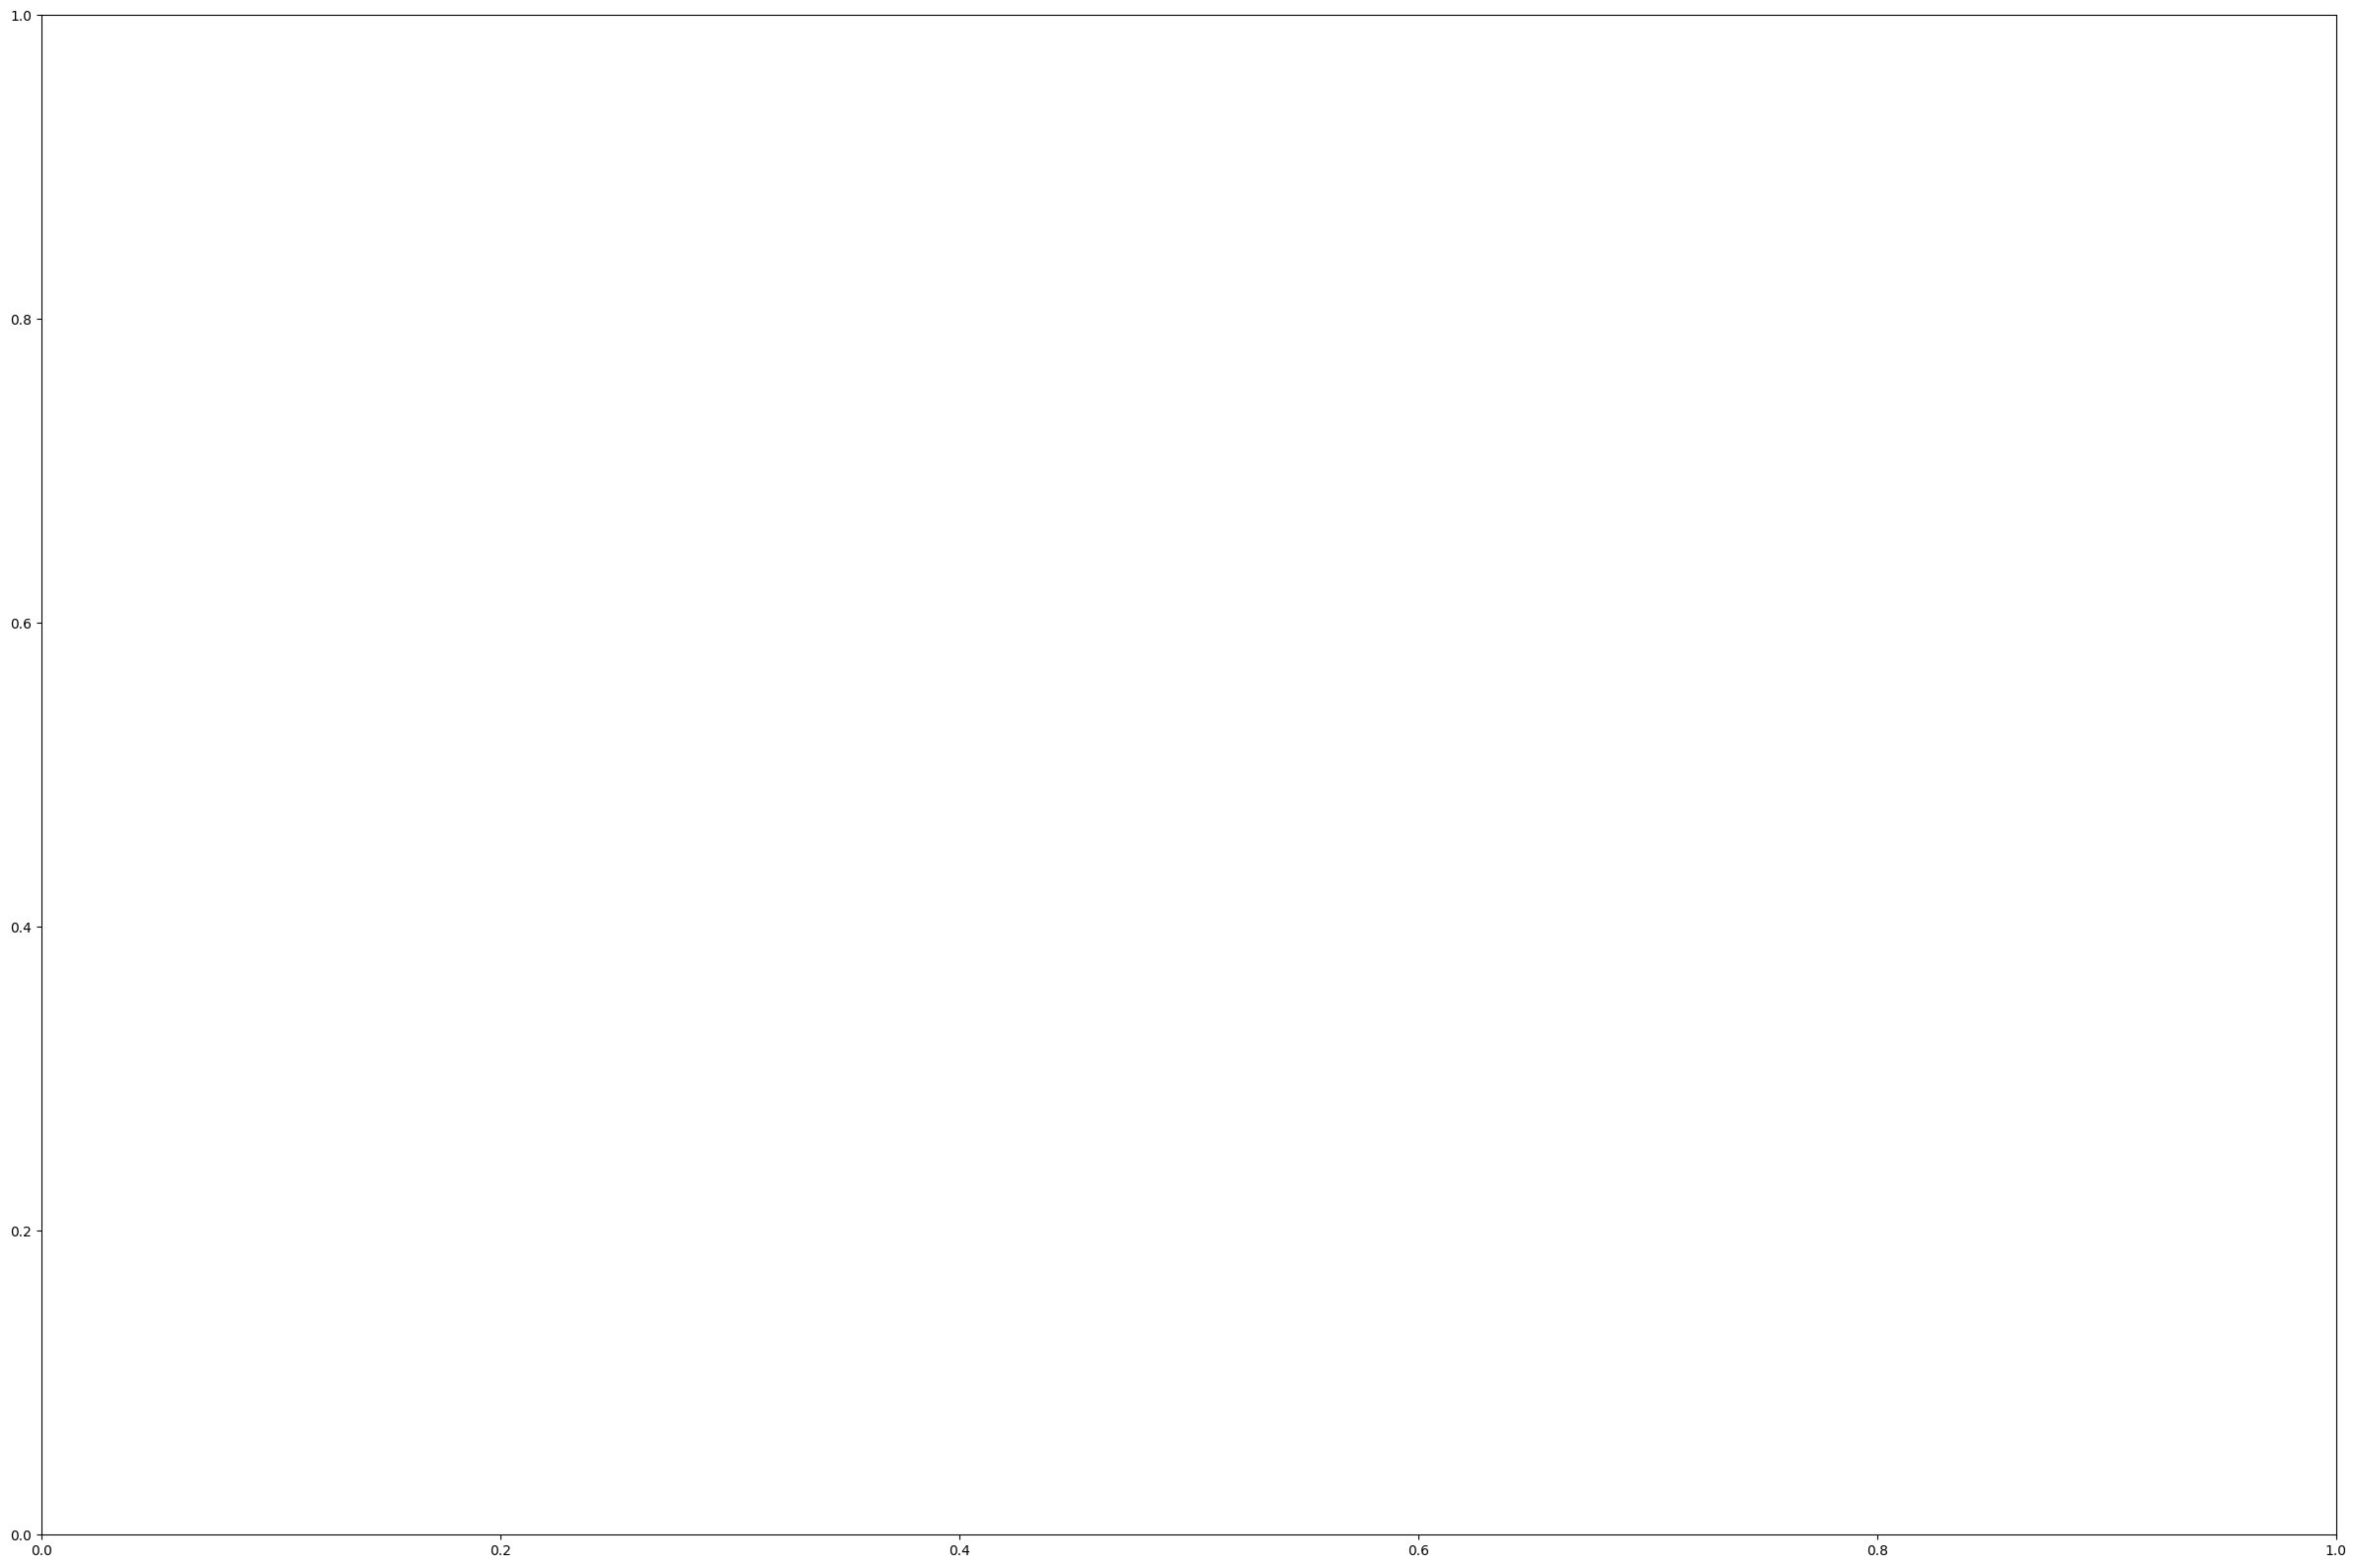

In [12]:
# File path
file = "/data/jlai/iris-hep/acts/thirdparty/OpenDataDetector/data/odd-material-maps.root"
f = uproot.open(file)

# η binning
eta_bins = np.linspace(-4, 4, 80)
eta_centers = 0.5 * (eta_bins[1:] + eta_bins[:-1])

# Group histograms by volume/module name
volume_eta_x0 = defaultdict(lambda: (np.zeros_like(eta_centers), np.zeros_like(eta_centers)))

for key, obj in f.items():
    if not key.endswith("/x0;1"):
        continue

    print(key)
    volname = key.split("/")[0]  # e.g., "SurfaceMaterial_vol2_bou0_lay0_app0_sen0"
    h_x0 = obj

    x0_vals = h_x0.values()
    theta_deg_centers = h_x0.axis(0).centers()  # b1 = θ in degrees
    phi_centers = h_x0.axis(1).centers()        # b0 = φ

    # Make 2D meshgrid of phi and theta centers to align with x0 values
    phi_grid, theta_grid = np.meshgrid(phi_centers, theta_deg_centers, indexing="ij")

    # Compute η from θ
    theta_rad = np.deg2rad(theta_grid)
    eta_grid = -np.log(np.tan(theta_rad / 2.0))

    # Flatten everything
    eta_flat = eta_grid.flatten()
    x0_flat = x0_vals.flatten()

    # Filter out invalid entries
    valid = (x0_flat > 0) & np.isfinite(eta_flat)
    eta_flat = eta_flat[valid]
    x0_flat = x0_flat[valid]

    # Accumulate into per-volume histogram
    sums, _ = np.histogram(eta_flat, bins=eta_bins, weights=x0_flat)
    counts, _ = np.histogram(eta_flat, bins=eta_bins)

    total_sums, total_counts = volume_eta_x0[volname]
    total_sums += sums
    total_counts += counts
    volume_eta_x0[volname] = (total_sums, total_counts)

# Now plot all ⟨X0⟩ vs η curves per volume
plt.figure(figsize=(30, 20))

# Define volume groups
volume_groups = {
    "beampipe": ["vol2"],
    "pixel": ["vol16", "vol17", "vol18"],
    "sstrips": ["vol23", "vol24", "vol25"],
    "lstrips": ["vol29", "vol30", "vol31"]
}

# Prepare stacked data
group_data = np.array(group_data)  # shape: (n_groups, n_bins)

bottom = np.zeros_like(eta_centers)

colors = ['blue', 'orange', 'green', 'red']
for i, (label, group_vals) in enumerate(zip(group_labels, group_data)):
    plt.bar(
        eta_centers, group_vals, width=np.diff(eta_bins),
        bottom=bottom, label=label, align="center",
        color=colors[i % len(colors)]
    )
    bottom += group_vals  # increment stack base


plt.xlabel("η")
plt.ylabel("Stacked ⟨X₀⟩ [mm]")
plt.title("Stacked Radiation Length vs. η by Detector Region")
plt.grid(True)
plt.legend(loc="upper right", fontsize="medium")
plt.tight_layout()
plt.show()


/tmp/ipykernel_3038152/3738928241.py:39: RuntimeWarning: divide by zero encountered in log
  eta_grid = -np.log(np.tan(theta_rad / 2.0))
/tmp/ipykernel_3038152/3738928241.py:39: RuntimeWarning: invalid value encountered in log
  eta_grid = -np.log(np.tan(theta_rad / 2.0))


beampipe ⟨t/X₀⟩ at η = 0: 0.00000
pixel ⟨t/X₀⟩ at η = 0: 0.51416
sstrips ⟨t/X₀⟩ at η = 0: 0.29804
lstrips ⟨t/X₀⟩ at η = 0: 0.92435


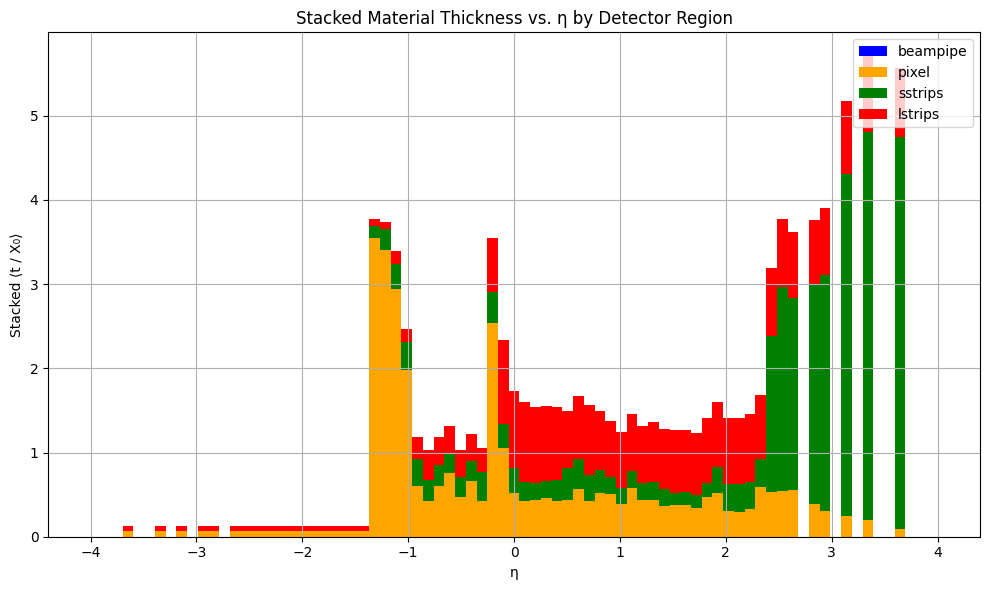

In [ ]:
file = "/data/jlai/iris-hep/acts/thirdparty/OpenDataDetector/data/odd-material-maps.root"
f = uproot.open(file)

# η binning
eta_bins = np.linspace(-4, 4, 80)
eta_centers = 0.5 * (eta_bins[1:] + eta_bins[:-1])

# Store per-volume t/x0 contributions binned in η
volume_eta_tx0 = defaultdict(lambda: (np.zeros_like(eta_centers), np.zeros_like(eta_centers)))

# Process all "t" histograms and match them with "x0"
for key in f.keys():
    if not key.endswith("/t;1"):
        continue

    volname = key.split("/")[0]
    t_hist = f[key]
    x0_key = volname + "/x0;1"

    if x0_key not in f:
        continue  # skip if x0 missing

    x0_hist = f[x0_key]

    t_vals = t_hist.values()
    x0_vals = x0_hist.values()

    theta_deg_centers = t_hist.axis(1).centers()  # b1 = θ
    phi_centers = t_hist.axis(0).centers()        # b0 = φ

    phi_grid, theta_grid = np.meshgrid(phi_centers, theta_deg_centers, indexing="ij")
    theta_rad = np.deg2rad(theta_grid)
    eta_grid = -np.log(np.tan(theta_rad / 2.0))

    eta_flat = eta_grid.flatten()
    t_flat = t_vals.flatten()
    x0_flat = x0_vals.flatten()

    # Compute t/x0 with filtering
    valid = (t_flat > 0) & (x0_flat > 0) & np.isfinite(eta_flat)
    tx0_flat = t_flat[valid] / x0_flat[valid]
    eta_flat = eta_flat[valid]

    sums, _ = np.histogram(eta_flat, bins=eta_bins, weights=tx0_flat)
    counts, _ = np.histogram(eta_flat, bins=eta_bins)

    total_sums, total_counts = volume_eta_tx0[volname]
    total_sums += sums
    total_counts += counts
    volume_eta_tx0[volname] = (total_sums, total_counts)

# Group volumes by detector region
volume_groups = {
    "beampipe": ["vol2"],
    "pixel": ["vol16", "vol17", "vol18"],
    "sstrips": ["vol23", "vol24", "vol25"],
    "lstrips": ["vol29", "vol30", "vol31"]
}

# Stack ⟨t/X₀⟩ by group
group_labels = []
group_data = []

for label, volnames in volume_groups.items():
    group_sum = np.zeros_like(eta_centers)

    for volname, (sums, counts) in volume_eta_tx0.items():
        vol_id = volname.split("_")[1]  # e.g., "vol2"
        if vol_id in volnames:
            mean_tx0 = np.divide(sums, counts, out=np.zeros_like(sums), where=counts > 0)
            group_sum += mean_tx0

    group_labels.append(label)
    group_data.append(group_sum)

    # Find index of bin closest to η = 0
    eta_zero_idx = np.argmin(np.abs(eta_centers))

    # Store and print value at η = 0
    tx0_at_eta0 = group_sum[eta_zero_idx]
    print(f"{label} ⟨t/X₀⟩ at η = 0: {tx0_at_eta0:.5f}")


# Plot stacked ⟨t/X₀⟩
plt.figure(figsize=(10, 6))
# plt.stackplot(eta_centers, group_data, labels=group_labels)
bin_width = np.diff(eta_bins)
bottom = np.zeros_like(eta_centers)
# colors = ['blue']
colors = ['blue', 'orange', 'green', 'red'] 

for i, (label, values) in enumerate(zip(group_labels, group_data)):
    plt.bar(
        eta_centers,
        values,
        width=bin_width,
        bottom=bottom,
        label=label,
        align='center',
        color=colors[i % len(colors)]
    )
    bottom += values


plt.xlabel("η")
plt.ylabel("Stacked ⟨t / X₀⟩")
plt.title("Stacked Material Thickness vs. η by Detector Region")
plt.grid(True)
plt.legend(loc="upper right", fontsize="medium")
plt.tight_layout()
plt.show()


In [26]:
file = "/data/jlai/iris-hep/acts/thirdparty/OpenDataDetector/data/odd-material-maps.root"
f = uproot.open(file)

# η binning
eta_bins = np.linspace(-4, 4, 80)
eta_centers = 0.5 * (eta_bins[1:] + eta_bins[:-1])

# Store per-volume t/x0 contributions binned in η
volume_eta_tx0 = defaultdict(lambda: (np.zeros_like(eta_centers), np.zeros_like(eta_centers)))

# Process all "t" histograms and match them with "x0"
for key in f.keys():
    if not key.endswith("/t;1"):
        continue

    volname = key.split("/")[0]
    t_hist = f[key]
    x0_key = volname + "/x0;1"

    if x0_key not in f:
        continue  # skip if x0 missing

    x0_hist = f[x0_key]

    t_vals = t_hist.values()
    x0_vals = x0_hist.values()

    theta_deg_centers = t_hist.axis(1).centers()  # b1 = θ
    phi_centers = t_hist.axis(0).centers()        # b0 = φ

    phi_grid, theta_grid = np.meshgrid(phi_centers, theta_deg_centers, indexing="ij")
    theta_rad = np.deg2rad(theta_grid)
    eta_grid = -np.log(np.tan(theta_rad / 2.0))

    eta_flat = eta_grid.flatten()
    t_flat = t_vals.flatten()
    x0_flat = x0_vals.flatten()

    # Compute t/x0 with filtering
    valid = (t_flat > 0) & (x0_flat > 0) & np.isfinite(eta_flat)
    tx0_flat = t_flat[valid] / x0_flat[valid]
    eta_flat = eta_flat[valid]

    sums, _ = np.histogram(eta_flat, bins=eta_bins, weights=tx0_flat)
    counts, _ = np.histogram(eta_flat, bins=eta_bins)

    total_sums, total_counts = volume_eta_tx0[volname]
    total_sums += sums
    total_counts += counts
    volume_eta_tx0[volname] = (total_sums, total_counts)

# Find index of bin closest to η = 0
eta_zero_idx = np.argmin(np.abs(eta_centers))

# Print ⟨t/X₀⟩ at η = 0 for each individual volume
print("Per-volume ⟨t/X₀⟩ at η = 0:")
for volname, (sums, counts) in sorted(volume_eta_tx0.items()):
    mean_tx0 = np.divide(sums, counts, out=np.zeros_like(sums), where=counts > 0)
    tx0_at_eta0 = mean_tx0[eta_zero_idx]
    print(f"{volname:50s} ⟨t/X₀⟩ @ η={eta_centers[eta_zero_idx]}: {tx0_at_eta0:.6f}")



/tmp/ipykernel_3038152/1230003784.py:33: RuntimeWarning: divide by zero encountered in log
  eta_grid = -np.log(np.tan(theta_rad / 2.0))
/tmp/ipykernel_3038152/1230003784.py:33: RuntimeWarning: invalid value encountered in log
  eta_grid = -np.log(np.tan(theta_rad / 2.0))


Per-volume ⟨t/X₀⟩ at η = 0:
SurfaceMaterial_vol16_bou0_lay10_app0_sen0         ⟨t/X₀⟩ @ η=0.0: 0.021909
SurfaceMaterial_vol16_bou0_lay12_app0_sen0         ⟨t/X₀⟩ @ η=0.0: 0.022161
SurfaceMaterial_vol16_bou0_lay14_app0_sen0         ⟨t/X₀⟩ @ η=0.0: 0.022515
SurfaceMaterial_vol16_bou0_lay16_app0_sen0         ⟨t/X₀⟩ @ η=0.0: 0.022839
SurfaceMaterial_vol16_bou0_lay2_app0_sen0          ⟨t/X₀⟩ @ η=0.0: 0.035645
SurfaceMaterial_vol16_bou0_lay4_app0_sen0          ⟨t/X₀⟩ @ η=0.0: 0.021262
SurfaceMaterial_vol16_bou0_lay6_app0_sen0          ⟨t/X₀⟩ @ η=0.0: 0.021546
SurfaceMaterial_vol16_bou0_lay8_app0_sen0          ⟨t/X₀⟩ @ η=0.0: 0.021581
SurfaceMaterial_vol17_bou0_lay2_app2_sen0          ⟨t/X₀⟩ @ η=0.0: 0.013702
SurfaceMaterial_vol17_bou0_lay4_app2_sen0          ⟨t/X₀⟩ @ η=0.0: 0.013498
SurfaceMaterial_vol17_bou0_lay6_app2_sen0          ⟨t/X₀⟩ @ η=0.0: 0.013376
SurfaceMaterial_vol17_bou0_lay8_app2_sen0          ⟨t/X₀⟩ @ η=0.0: 0.013540
SurfaceMaterial_vol17_bou1_lay0_app0_sen0          ⟨t/X₀⟩ @ 